<a href="https://colab.research.google.com/github/Dananjali/Breast-Cancer-Detection-Model-Comparison/blob/main/Breast_Cancer_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Importing Dataset

In [31]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
df.isnull().sum() # Check for any missing values

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [33]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Check updated shape and first few rows
print("Updated shape:", df.shape)
df.head()

Updated shape: (569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Encoding Data

In [34]:
# Convert diagnosis from text to numerical using LabelEncoder
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Visualising Data

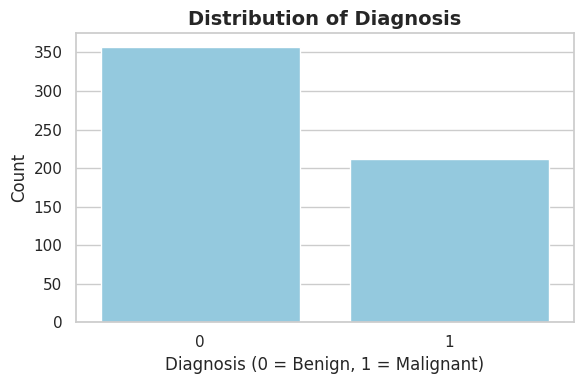

In [35]:
# Plot diagnosis distribution
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, color='skyblue')
plt.title("Distribution of Diagnosis", fontsize=14, fontweight='bold')
plt.xlabel("Diagnosis (0 = Benign, 1 = Malignant)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

# Feature Correlation Analysis

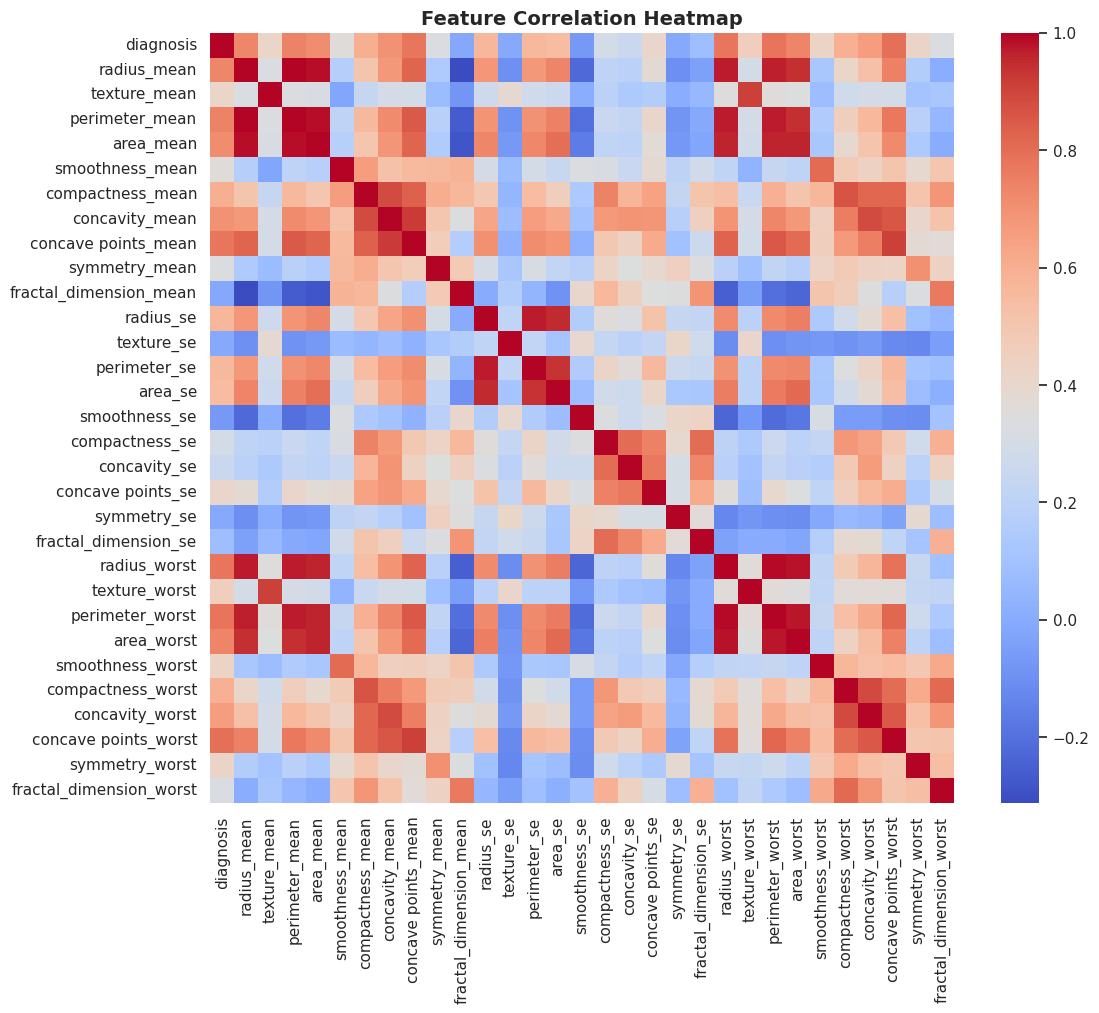

In [36]:
# Compute correlation matrix
plt.figure(figsize=(12, 10))
corr = df.corr()

# Plot heatmap
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')
plt.show()

In [37]:
# Compute correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(f"Dropped highly correlated features:", to_drop)

# Drop selected features
df_selected = df.drop(columns=to_drop)
df_selected.head()

Dropped highly correlated features: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [38]:
# Defining the feature set (X) and the target variable (y)
X = df_selected.drop('diagnosis', axis=1)
y = df_selected['diagnosis']

# Feature Scaling

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting data into train set and test set

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [41]:
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(cm_log_reg)
print(class_report_log_reg)
print(accuracy_log_reg)

[[70  1]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

0.9824561403508771


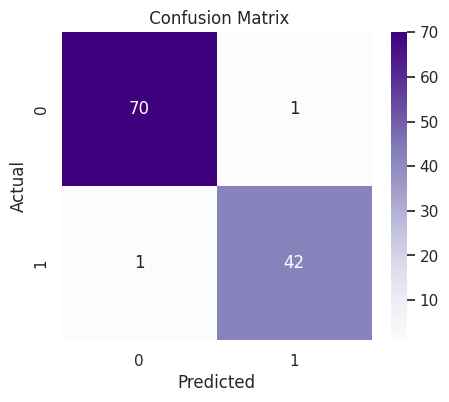

In [42]:
cm = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix")
plt.show()

# Random Forest Classifier

In [43]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [44]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
cm_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(cm_rf)
print(class_report_rf)
print(accuracy_rf)

[[69  2]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

0.9649122807017544


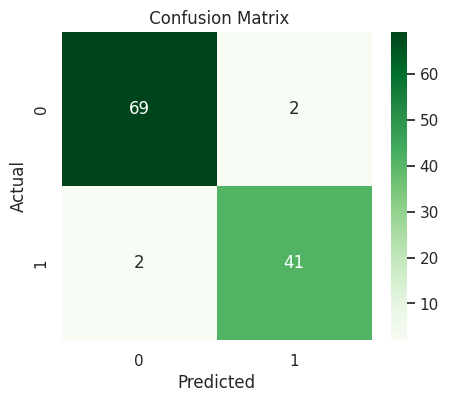

In [45]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix")
plt.show()

# Cross Validation Score

In [46]:
# Apply cross-validation to the best model to ensure it is consistent
best_model = LogisticRegression(max_iter=10000)
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-Validated Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validated Accuracy Scores: [0.96491228 0.95614035 0.96491228 0.97368421 0.97345133]
Mean CV Accuracy: 0.9666200900481291


# Feature Importance

<ipython-input-47-a9cad436c3fc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_imp_log_reg, x='Importance', y='Feature', palette="coolwarm")


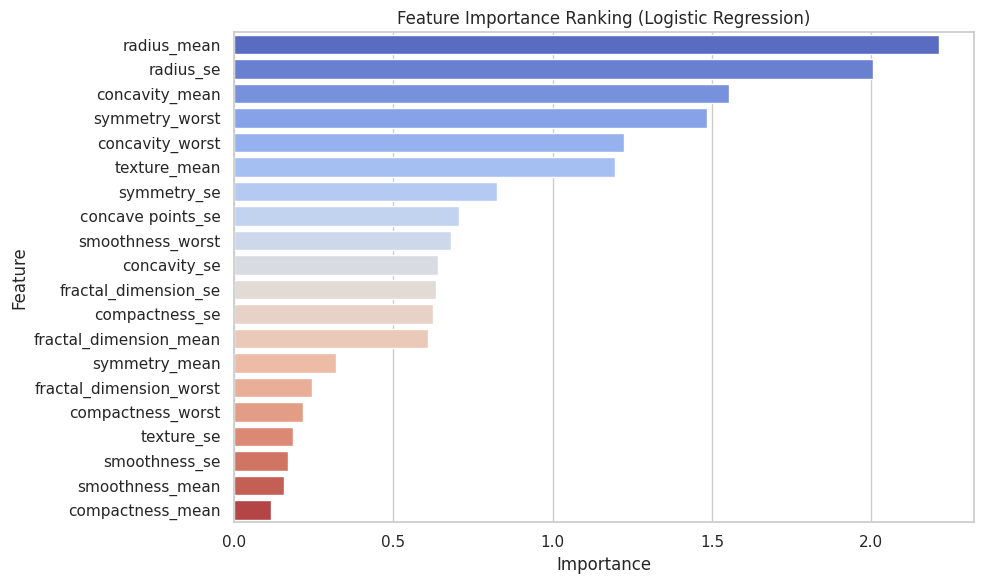

In [47]:
# Get the coefficients of the Logistic Regression model
importance_log_reg = log_reg.coef_[0]  # Accessing the coefficients of the trained Logistic Regression model

# Creating a DataFrame to display the features alongside their importance scores
feature_imp_log_reg = pd.DataFrame({
    'Feature': df_selected.drop('diagnosis', axis=1).columns,  # Features excluding the target variable
    'Importance': np.abs(importance_log_reg)  # Taking absolute value of coefficients for ranking
}).sort_values('Importance', ascending=False)

feature_imp_log_reg.head()

# Plotting the feature importance
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp_log_reg, x='Importance', y='Feature', palette="coolwarm")
plt.title('Feature Importance Ranking (Logistic Regression)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


# ROC & AUC

In [56]:
y_pred_log_reg_proba = log_reg.predict_proba(X_test) [:, 1] # Probabilities for the positive class (Malignant)
# Calculate False Positive Rate and True Positive Rate for plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_log_reg_proba)
roc_auc = auc(fpr, tpr)

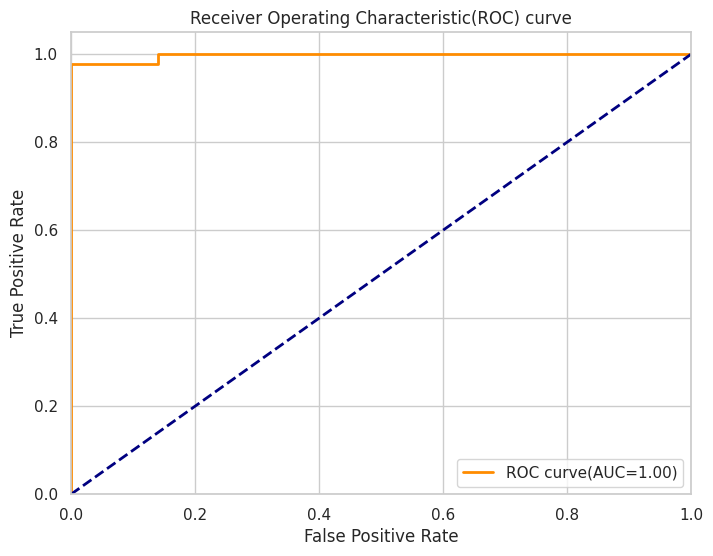

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve(AUC={roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic(ROC) curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = "lower right")
plt.show()